In [32]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x, y, e_y = np.loadtxt('data.txt', unpack=True)

def f(x, a, k):
    return (1/(np.sqrt(1 + a*((k-x)**2))))

# correct values which should be calculated
# a=0.003097
# k=35.4

In [3]:
popt, pcov = curve_fit(f, x, y)

<ipython-input-2-ca8ba8024b53>:8: RuntimeWarning: invalid value encountered in sqrt
  return (1/(np.sqrt(1 + a*((k-x)**2))))


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [8]:
popt, pcov = curve_fit(f, x, y, maxfev = 100000000)

<ipython-input-4-767b14292cda>:8: RuntimeWarning: invalid value encountered in sqrt
  return (1/(np.sqrt(1 + a*((k-x)**2))))


[-6.60158511e-10 -3.86902845e+04]


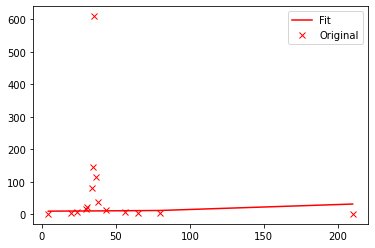

In [10]:
plt.plot(x, f(x, *popt), 'r-', label='Fit')
plt.plot(x, y, 'rx', label='Original')
plt.legend(loc='best')
# plt.savefig('curve.pdf')
print(popt)

[639.6703374   33.5839742   35.34554523]


<ipython-input-13-5c4f4a5bcdb2>:2: RuntimeWarning: invalid value encountered in sqrt
  return (b/(np.sqrt(1 + a*((k-x)**2))))


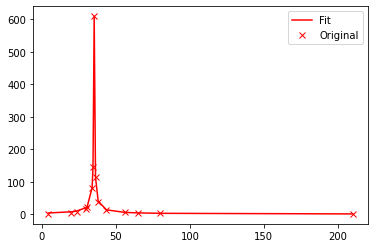

In [13]:
def f(x, b, a, k):
    return (b/(np.sqrt(1 + a*((k-x)**2))))

popt, pcov = curve_fit(f, x, y, p0=[20, 600.0, 35.0])

plt.plot(x, f(x, *popt), 'r-', label='Fit')
plt.plot(x, y, 'rx', label='Original')
plt.legend(loc='best')
# plt.savefig('curve.pdf')
print(popt)

<ipython-input-25-45708b1c48e7>:11: RuntimeWarning: overflow encountered in exp
  intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )


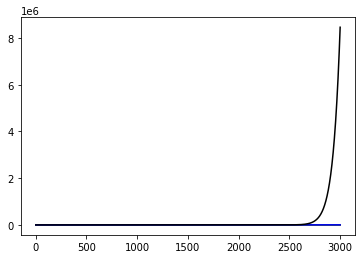

In [25]:
import matplotlib.pyplot as plt
import numpy as np

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 1 #2.0*h*c**2
    b = 1/(wav*T) #h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 3e-6, 1e-9) 

# intensity at 4000K, 5000K, 6000K, 7000K
intensity4000 = planck(wavelengths, 4000.)
intensity5000 = planck(wavelengths, 5000.)
intensity6000 = planck(wavelengths, 6000.)
intensity7000 = planck(wavelengths, 7000.)


plt.plot(wavelengths*1e9, intensity4000, 'r-') 
# plot intensity4000 versus wavelength in nm as a red line
plt.plot(wavelengths*1e9, intensity5000, 'g-') # 5000K green line
plt.plot(wavelengths*1e9, intensity6000, 'b-') # 6000K blue line
plt.plot(wavelengths*1e9, intensity7000, 'k-') # 7000K black line

# show the plot
plt.show()

In [30]:
intensity6000new = 0.1 * np.random.randn(intensity6000)
plt.plot(wavelengths*1e9, intensity6000new, 'b-') # 6000K blue line

TypeError: only integer scalar arrays can be converted to a scalar index

(array([2.653e+03, 3.200e+01, 1.900e+01, 1.400e+01, 1.100e+01, 9.000e+00,
        7.000e+00, 7.000e+00, 6.000e+00, 5.000e+00, 5.000e+00, 4.000e+00,
        4.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100.]),
 <BarContainer object of 25 artists>)

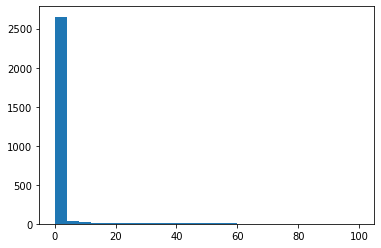

In [28]:
plt.hist(intensity6000,range=(0,100),bins=25)

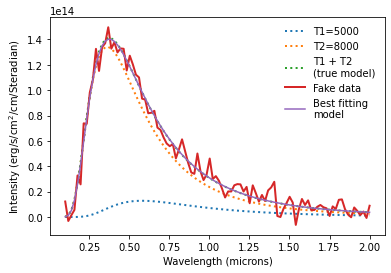

In [39]:
from scipy.optimize import curve_fit
# import pylab as plt
import numpy as np

def blackbody_lam(lam, T):
    """ Blackbody as a function of wavelength (um) and temperature (K).

    returns units of erg/s/cm^2/cm/Steradian
    """
    from scipy.constants import h,k,c
    lam = 1e-6 * lam # convert to metres
    return 2*h*c**2 / (lam**5 * (np.exp(h*c / (lam*k*T)) - 1))

wa = np.linspace(0.1, 2, 100)   # wavelengths in um
T1 = 5000.
T2 = 8000.
y1 = blackbody_lam(wa, T1)
y2 = blackbody_lam(wa, T2)
ytot = y1 + y2

np.random.seed(1)

# make synthetic data with Gaussian errors

sigma = np.ones(len(wa)) * 1 * np.median(ytot)/3
ydata = ytot + np.random.randn(len(wa)) * sigma

# plot the input model and synthetic data

plt.figure()
plt.plot(wa, y1, ':', lw=2, label='T1=%.0f' % T1)
plt.plot(wa, y2, ':', lw=2, label='T2=%.0f' % T2)
plt.plot(wa, ytot, ':', lw=2, label='T1 + T2\n(true model)')
plt.plot(wa, ydata, ls='-', lw=2, label='Fake data')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Intensity (erg/s/cm$^2$/cm/Steradian)')

# fit two blackbodies to the synthetic data

def func(wa, T1, T2):
    return blackbody_lam(wa, T1) + blackbody_lam(wa, T2)

# Note the initial guess values for T1 and T2 (p0 keyword below). They
# are quite different to the known true values, but not *too*
# different. If these are too far away from the solution curve_fit()
# will not be able to find a solution. This is not a Python-specific
# problem, it is true for almost every fitting algorithm for
# non-linear models. The initial guess is important!

popt, pcov = curve_fit(func, wa, ydata, p0=(1000, 3000), sigma=sigma)

# get the best fitting parameter values and their 1 sigma errors
# (assuming the parameters aren't strongly correlated).

bestT1, bestT2 = popt
sigmaT1, sigmaT2 = np.sqrt(np.diag(pcov))

ybest = blackbody_lam(wa, bestT1) + blackbody_lam(wa, bestT2)

# print('True model values')
# print('  T1 = %.2f' % T1)
# print('  T2 = %.2f' % T2)

# print('Parameters of best-fitting model:')
# print('  T1 = %.2f +/- %.2f' % (bestT1, sigmaT1))
# print('  T2 = %.2f +/- %.2f' % (bestT2, sigmaT2))

degrees_of_freedom = len(wa) - 2
resid = (ydata - func(wa, *popt)) / sigma
chisq = np.dot(resid, resid)

# print degrees_of_freedom, 'dof'
# print 'chi squared %.2f' % chisq
# print 'nchi2 %.2f' % (chisq / degrees_of_freedom)

# plot the solution

plt.plot(wa, ybest, label='Best fitting\nmodel')
plt.legend(frameon=False)
# plt.savefig('fit_bb.png')
plt.show()

In [35]:
sigma

array([2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
       2.22085003e+13, 2.22085003e+13, 2.22085003e+13, 2.22085003e+13,
      